## 0x01 作业要求
社会公众对自动驾驶汽车测试的接受度影响因素有哪些?
具体要求:
- 1.要求同学们对原始数据进行编码，进行基本的描述性统计分析，具体 方法可参考课件第三讲;
- 2.选择合适的离散选择模型对数据进行分析;
- 3.对模型结果进行一定分析和解释;
- 4.形成一份不少于6页的分析报告并按时提交。
- 5.11月21日前在canvas系统中提交

## 0x02 数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


/var/folders/6s/d3zr9my94njd1q1hrj7t4bmr0000gn/T/ipykernel_21483/154201488.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df_bikepghmembers=pd.read_excel('bikepghmembers.xlsx',sheet_name='Sheet1')
features=df_bikepghmembers.columns[5:20]
dataset=df_bikepghmembers[features]

## 2.1 数据缺失值处理

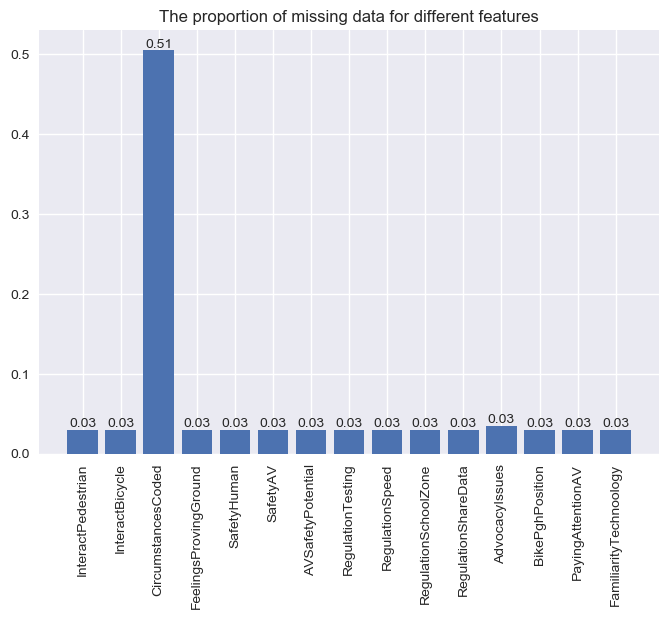

In [4]:
col_nandata=dataset.isnull().sum()
col_nandata_rate=col_nandata/len(dataset)
plt.bar(col_nandata_rate.index,col_nandata_rate)
plt.xticks(rotation=90)
plt.bar_label(plt.gca().containers[0],fmt='%.2f')
plt.title('The proportion of missing data for different features')
plt.show()

In [5]:
dataset.dropna(subset=[features[0]], inplace=True)
dataset=dataset.drop(columns=['CircumstancesCoded'])
dataset=dataset.reset_index(drop=True)

/var/folders/6s/d3zr9my94njd1q1hrj7t4bmr0000gn/T/ipykernel_21483/1695643001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=[features[0]], inplace=True)


## 2.2 数据标签分布

In [6]:
features=dataset.columns
features

Index(['InteractPedestrian', 'InteractBicycle', 'FeelingsProvingGround',
       'SafetyHuman', 'SafetyAV', 'AVSafetyPotential', 'RegulationTesting',
       'RegulationSpeed', 'RegulationSchoolZone', 'RegulationShareData',
       'AdvocacyIssues', 'BikePghPosition', 'PayingAttentionAV',
       'FamiliarityTechnoology'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x169156700>,
 [Text(6.735557395310444e-17, 1.1, 'Approve'),
  Text(-0.8844464187091692, -0.6540294583828201, 'Somewhat Approve'),
  Text(0.12316096757443452, -1.0930834259406412, 'Neutral'),
  Text(0.7886494998286389, -0.7668324239493515, 'Somewhat Disapprove'),
  Text(1.0666584826598933, -0.2687744060912324, 'Disapprove')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-0.4824253192959104, -0.3567433409360837, '20.27%'),
  Text(0.06717870958605518, -0.5962273232403497, '13.04%'),
  Text(0.43017245445198476, -0.41827223124510077, '8.84%'),
  Text(0.5818137178144871, -0.14660422150430855, '7.86%')])

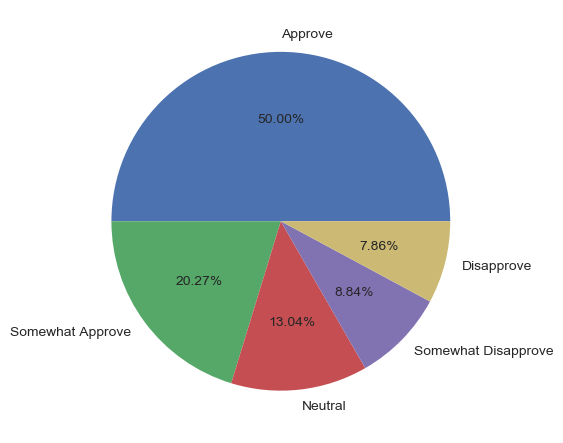

In [7]:
res=dataset['FeelingsProvingGround'].value_counts()
plt.pie(res,labels=res.index,autopct='%.2f%%')

## 2.3 社会群众实际接触自动驾驶

In [8]:
# 居民
def cont(feature):
    print(feature)
    print(dataset[feature].value_counts()/len(dataset))
    print('----------------------------------')
for f in [0,1,-2,-1]:
    cont(features[f]) 

InteractPedestrian
No          0.537500
Yes         0.365179
Not sure    0.097321
Name: InteractPedestrian, dtype: float64
----------------------------------
InteractBicycle
Yes         0.453571
No          0.444643
Not sure    0.101786
Name: InteractBicycle, dtype: float64
----------------------------------
PayingAttentionAV
To a moderate extent    0.331250
To some extent          0.300893
To a large extent       0.263393
To little extent        0.091071
Not at all              0.013393
Name: PayingAttentionAV, dtype: float64
----------------------------------
FamiliarityTechnoology
Somewhat familiar      0.428571
Mostly Unfamiliar      0.210714
Mostly familiar        0.201786
Extremely familiar     0.095536
Not familiar at all    0.063393
Name: FamiliarityTechnoology, dtype: float64
----------------------------------


## 2.4 社会群众对自动驾驶安全的看法

In [9]:
# no experiecne的随便选择，因为这里满足一定的顺序
import random

# safetyHuman
for i in range(len(dataset)):
    if type(dataset.iloc[i,3])!=int:
        dataset.iloc[i,3]=random.randint(1,5)
# same as safetyAV
for i in range(len(dataset)):
    if type(dataset.iloc[i,4])!=int:
        dataset.iloc[i,4]=random.randint(1,5)

# AV safety使用one-hot编码
from sklearn.preprocessing import OneHotEncoder
#首先需要将中文的标称变量转换为数字
dataset.iloc[:,5]=dataset.iloc[:,5].map({'No':1,'Not sure':2,'Maybe':3,'Yes':4})


In [10]:
data=dataset.iloc[:,3:6]

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


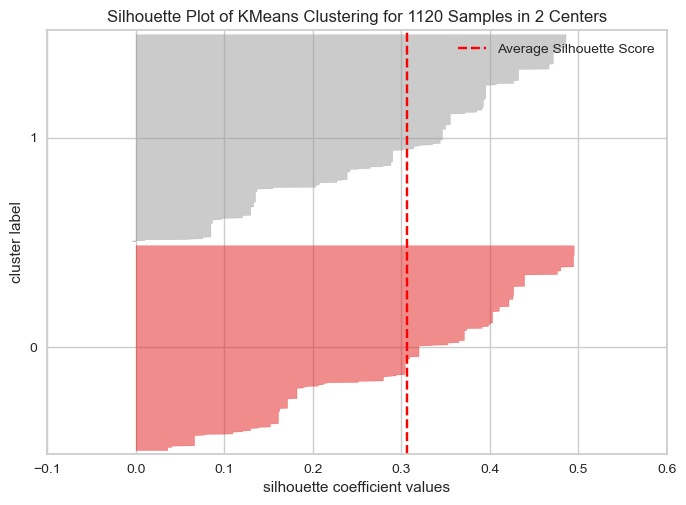

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


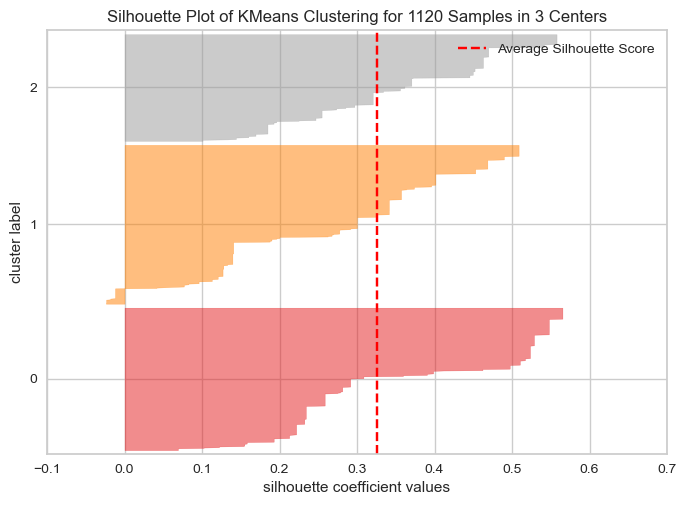

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


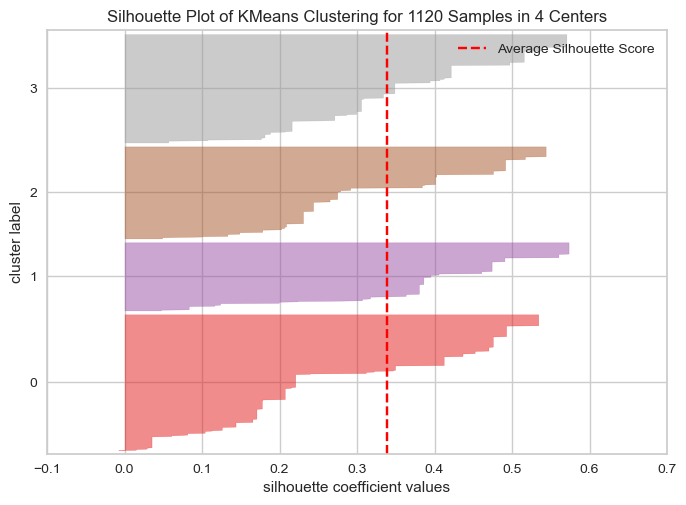

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


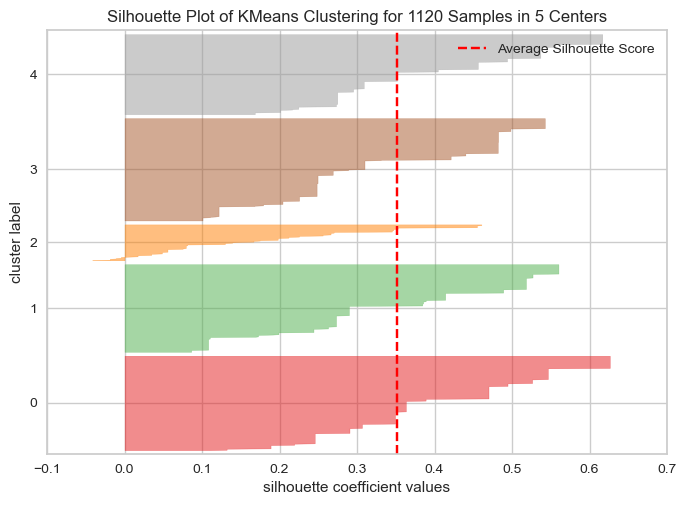

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


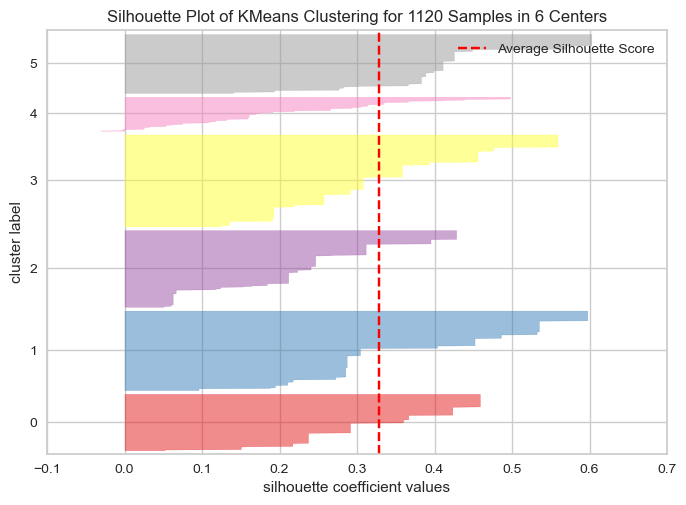

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


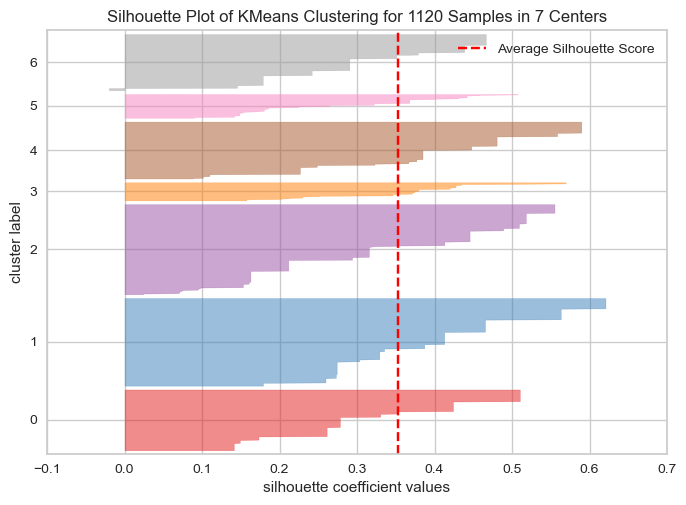

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


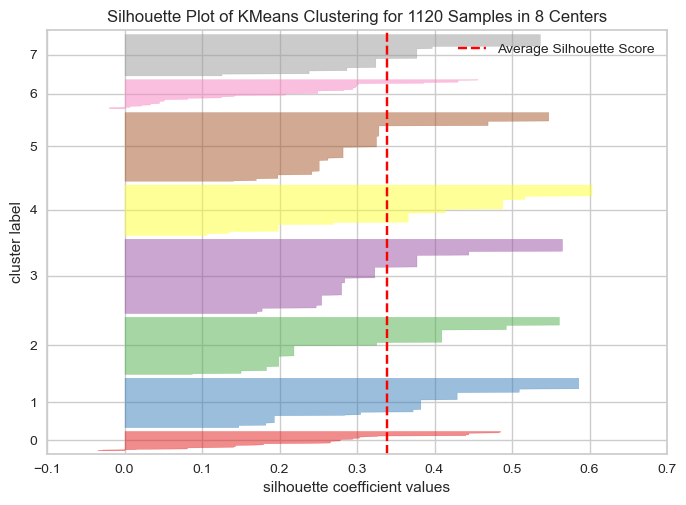

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


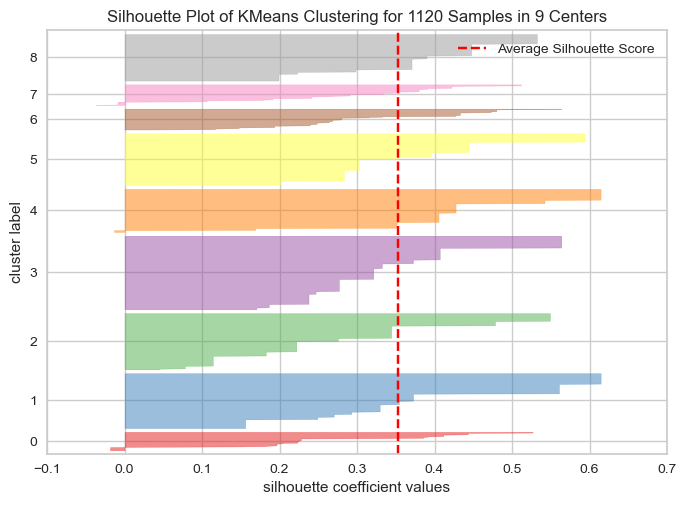

In [11]:
# 轮廓系数
for i in range(2,10):
    # 对data进行kmeans聚类
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=i,random_state=0).fit(data)
    kmeans.labels_
    from sklearn.metrics import silhouette_score
    silhouette_score(data,kmeans.labels_)
    # 轮廓系数可视化
    from yellowbrick.cluster import SilhouetteVisualizer
    visualizer=SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.poof()

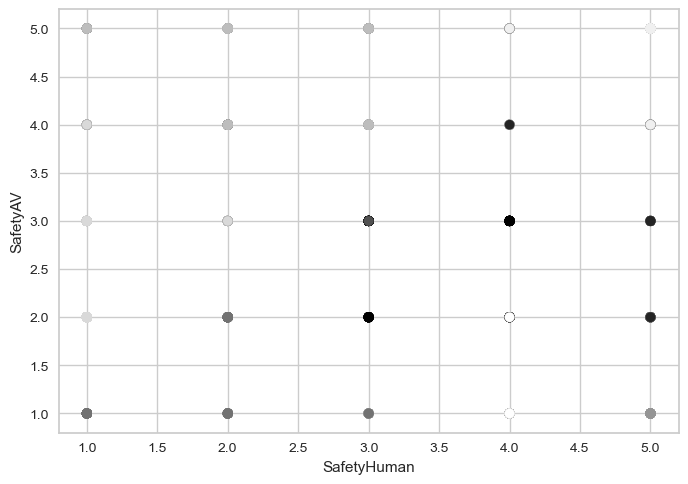

In [12]:
# 对聚类结果进行可视化
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=kmeans.labels_)
plt.xlabel('SafetyHuman')
plt.ylabel('SafetyAV')
plt.show()
 

In [13]:
# 对kmeans结果做评价
from sklearn.metrics import silhouette_score
silhouette_score(data,kmeans.labels_)
# 0.499

0.35232170815609426

Text(0, 0.5, 'AV safety Potential')

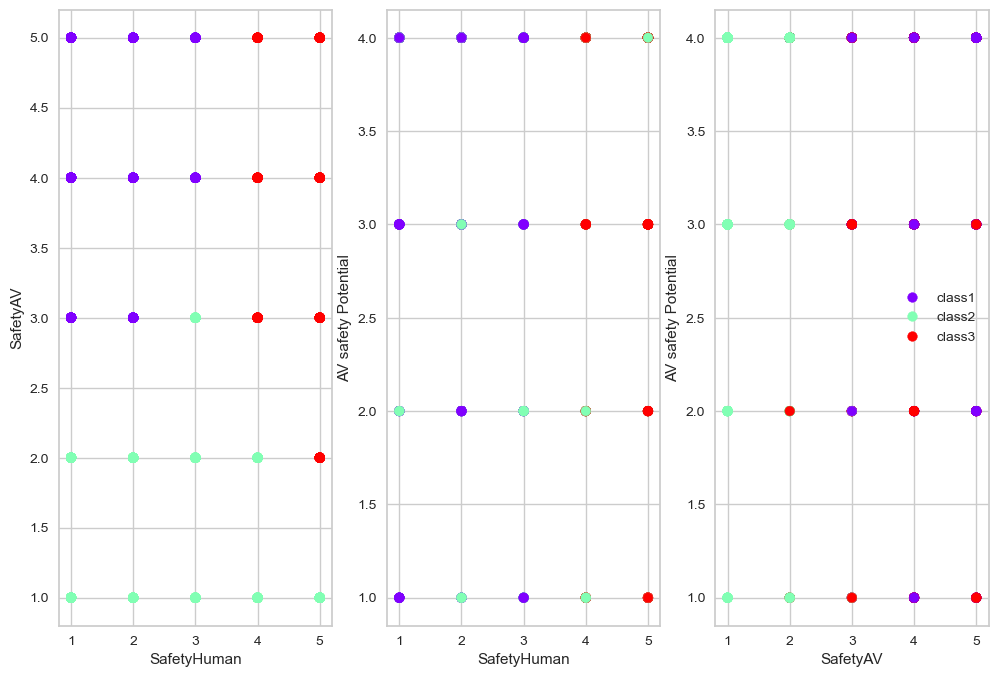

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0).fit(data)
# kmeans聚类结果可视化
figure=plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
scatter=plt.scatter(data.iloc[:,0],data.iloc[:,1],c=kmeans.labels_,cmap='rainbow')
plt.xlabel('SafetyHuman')
plt.ylabel('SafetyAV')
plt.subplot(1,3,2)
plt.scatter(data.iloc[:,0],data.iloc[:,2],c=kmeans.labels_,cmap='rainbow')
plt.xlabel('SafetyHuman')
plt.ylabel('AV safety Potential')
plt.subplot(1,3,3)
plt.scatter(data.iloc[:,1],data.iloc[:,2],c=kmeans.labels_,cmap='rainbow')
classes=['class1','class2','class3']
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='best')
plt.xlabel('SafetyAV')
plt.ylabel('AV safety Potential')


# seaborn


In [16]:
np.unique(dataset.iloc[:,13])

array(['Extremely familiar', 'Mostly Unfamiliar', 'Mostly familiar',
       'Not familiar at all', 'Somewhat familiar'], dtype=object)

In [17]:
## 2.5 对自动驾驶汽车法规的看法
map0={'Approve':5,'Somewhat Approve':4,'Neutral':3,'Somewhat Disapprove':2,'Disapprove':1}
map1={'No':1,'Not sure':2,'Maybe':3,'Yes':4}
map2={'Strongly Disagree':1,'Disagree':2,'Neutral':3,'Agree':4,'Strongly Agree':5}
map3={'Actively Oppose':1,'No Opinion':2,'Neither Support nor Oppose':3,'Actively Support':4,'':5}
map4={'To a large extent':5, 'To a moderate extent':4,'To some extent':3, 'To little extent':2,'Not at all':1 }
map5={'Extremely familiar':5,'Mostly familiar':4,'Somewhat familiar':3,'Mostly Unfamiliar':2,'Not familiar at all':1}
temp=[0,1,6,7,8,9]
for v in temp:
    dataset.iloc[:,v]=dataset.iloc[:,v].map(map1)
dataset.iloc[:,2]=dataset.iloc[:,2].map(map0)
dataset.iloc[:,10]=dataset.iloc[:,10].map(map2)
dataset.iloc[:,11]=dataset.iloc[:,11].map(map3)
dataset.iloc[:,12]=dataset.iloc[:,12].map(map4)
dataset.iloc[:,13]=dataset.iloc[:,13].map(map5)

In [18]:
features

Index(['InteractPedestrian', 'InteractBicycle', 'FeelingsProvingGround',
       'SafetyHuman', 'SafetyAV', 'AVSafetyPotential', 'RegulationTesting',
       'RegulationSpeed', 'RegulationSchoolZone', 'RegulationShareData',
       'AdvocacyIssues', 'BikePghPosition', 'PayingAttentionAV',
       'FamiliarityTechnoology'],
      dtype='object')

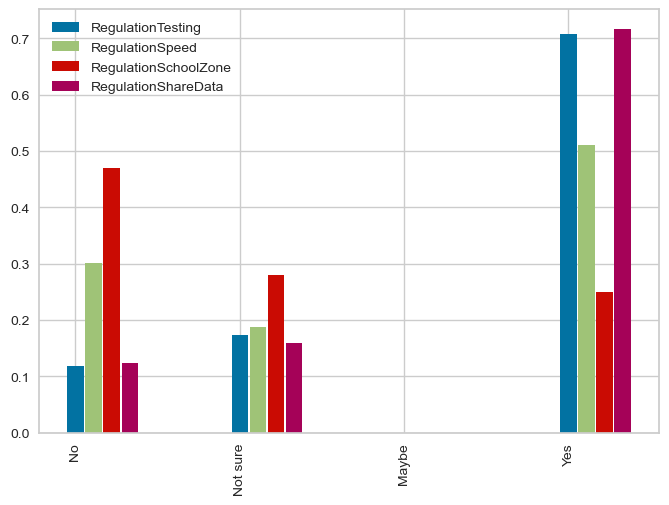

In [20]:
width=0.1
bias=0
for i in range(6,10):
    res=dataset.iloc[:,i].value_counts()/len(dataset)
    plt.bar(res.index+bias,res.values,width=width)
    bias+=0.11

plt.xticks([1,2,3,4],[key1 for key1 in map1])
plt.xticks(rotation=90)
plt.legend(features[6:10])

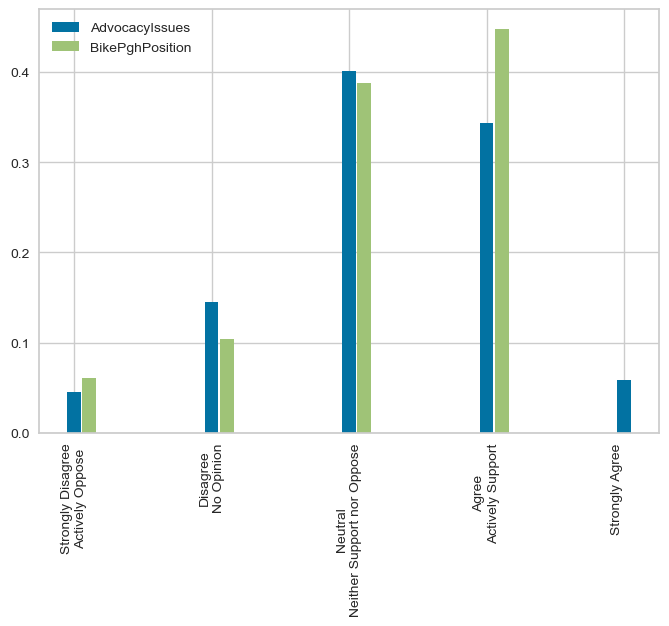

In [19]:
width=0.1
bias=0
for i in range(10,12):
    res=dataset.iloc[:,i].value_counts()/len(dataset)
    plt.bar(res.index+bias,res.values,width=width)
    bias+=0.11
map3={'Actively Oppose':1,'No Opinion':2,'Neither Support nor Oppose':3,'Actively Support':4,'':5}
plt.xticks([1,2,3,4,5],[key1+'\n'+key2 for key1,key2 in zip(map2,map3)])
plt.xticks(rotation=90)
plt.legend(features[10:12])

In [21]:
## 离散选择模型建模
d=dataset[features[2]]
dataset.insert(0,'y',d)
dataset.pop(features[2])

0       1
1       2
2       3
3       5
4       4
       ..
1115    2
1116    3
1117    4
1118    1
1119    4
Name: FeelingsProvingGround, Length: 1120, dtype: int64

In [99]:
dataset=dataset.to_numpy()
dataset=np.array(dataset,dtype=float)
import statsmodels.api as sm
logit_mod = sm.MNLogit(dataset[:,0],dataset[:,1:])
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.812017
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  321
Model:                        MNLogit   Df Residuals:                      269
Method:                           MLE   Df Model:                           48
Date:                Sat, 12 Nov 2022   Pseudo R-squ.:                  0.3559
Time:                        15:24:44   Log-Likelihood:                -260.66
converged:                       True   LL-Null:                       -404.66
Covariance Type:            nonrobust   LLR p-value:                 5.837e-36
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9503      0.630     -1.509      0.131      -2.185       0.284
x2             0.9961      0

In [11]:
#定义向前逐步回归函数
from  statsmodels.formula.api import mnlogit
def forward_select(data,target):
    variate=set(data.columns)  #将字段名转换成字典类型
    variate.remove(target)  #去掉因变量的字段名
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
    #循环筛选变量
    while variate:
        aic_with_variate=[]
        for candidate in variate:  #逐个遍历自变量
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic=mnlogit(formula=formula,data=data).fit(method='cg',maxiter=250).aic  #利用ols训练模型得出aic值
            aic_with_variate.append((aic,candidate))  #将第每一次的aic值放进空列表
        aic_with_variate.sort(reverse=True)  #降序排序aic值
        best_new_score,best_candidate=aic_with_variate.pop()  #最好的aic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score>best_new_score:  #如果目前的aic值大于最好的aic值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score=best_new_score  #最新的分数等于最好的分数
            print("aic is {},continuing!".format(current_score))  #输出最小的aic值
        else:
            print("for selection over!")
            break
    formula="{}~{}".format(target,"+".join(selected))  #最终的模型式子
    print("final formula is {}".format(formula))
    model=mnlogit(formula=formula,data=data).fit(method='cg',maxiter=250)
    return(model)

# 利用向前逐步回归筛选变量
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=0).fit(data)
dataset['kmenaslabel']=kmeans.labels_
lm_0=forward_select(data=dataset,target='y')


NameError: name 'data' is not defined

In [127]:
print(lm_0.summary())

ValueError: need covariance of parameters for computing (unnormalized) covariances

In [22]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(data)
dataset['kmenaslabel']=kmeans.labels_
dataset.to_csv('dataset.csv')

In [14]:
res=''
for i in features:
    res+=i+'+'
res


'InteractPedestrian+InteractBicycle+FeelingsProvingGround+SafetyHuman+SafetyAV+AVSafetyPotential+RegulationTesting+RegulationSpeed+RegulationSchoolZone+RegulationShareData+AdvocacyIssues+BikePghPosition+PayingAttentionAV+FamiliarityTechnoology+'